# CS 421: Data Mining - lab 3

## Objectives
1. Applying preprocessing techniques learnt before and see their effects on classification accuracy
2. Exploring different classification models and performing tuning of their parameters
3. Exploring different techniques for evaluating classification models
4. Learning how to analyze observed results and explain observations in a detailed report .

## Problem Statement
Given the MAGIC gamma telescope dataset that can be obtained using the link below.  
https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. This dataset is generated to simulate
registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using
the imaging technique. The dataset consists of two classes; gammas (signal) and hadrons (background). There
are 12332 gamma events and 6688 hadron events . You are required to apply preprocessing techniques on this
dataset and use the preprocessed dataset to construct different classification models such as **Decision Trees,
Naïve Bayes Classifier, Random Forests, AdaBoost, K-Nearest Neighbor (K-NN) and Support Vector
Machines (SVM)**. You are also required to tune the parameters of these models, compare the performance of
the learned models before and after preprocessing and compare the performance of models with each other.

----
## Data Loading and Exploration

In [16]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
attrNames = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
raw_data = pd.read_csv('data/magic04.data', header=None, names=attrNames)
raw_data.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [3]:
raw_data.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [4]:
gSize = len(raw_data[raw_data["class"] == "g"])
hSize = len(raw_data[raw_data["class"] == "h"])
print("'g' class size: " + str(gSize) + " - 'h' class size: " + str(hSize))

'g' class size: 12332 - 'h' class size: 6688


---
## Data preprocessing
### 1. Balancing data
Note that the dataset is class-imbalanced. To balance the dataset, randomly put aside the extra readings for
the gamma “g” class to make both classes equal in size.  
**note:** There are also other several methods such as repeating class "h" or giving it more weights.

In [5]:
np.random.seed(10) # setting random seed so that no changes in the results with several runs
remove_n = gSize - hSize # size to be removed
drop_indices = np.random.choice(raw_data[raw_data["class"] == "g"].index, remove_n, replace=False)
balanced_data = raw_data.drop(drop_indices)

In [6]:
gSize = len(balanced_data[balanced_data["class"] == "g"])
hSize = len(balanced_data[balanced_data["class"] == "h"])
print("in balanced data, 'g' class size: " + str(gSize) + " - 'h' class size: " + str(hSize))

in balanced data, 'g' class size: 6688 - 'h' class size: 6688


### 2. Visualizing Data 

### 2.1. Box Plot

In [12]:
X = balanced_data.drop("class", axis=1) # data without labels
y = balanced_data["class"] # labels

In [13]:
X.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,57.219860,23.660832,2.840342,0.379461,0.214810,-7.612699,7.458826,0.340858,31.423702,195.267559
std,46.975277,20.921690,0.474841,0.184889,0.112424,65.510834,56.297616,23.235998,26.934742,76.364887
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.675125,11.686600,2.493500,0.233400,0.127200,-24.588625,-14.632525,-10.935950,7.355875,142.977725
50%,38.590200,17.162500,2.751850,0.355400,0.197300,2.753000,14.577450,1.279050,23.482600,193.768400
75%,76.021100,26.058525,3.118800,0.505825,0.287000,23.615350,34.722450,11.122000,52.437825,242.887750
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


/home/zook/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


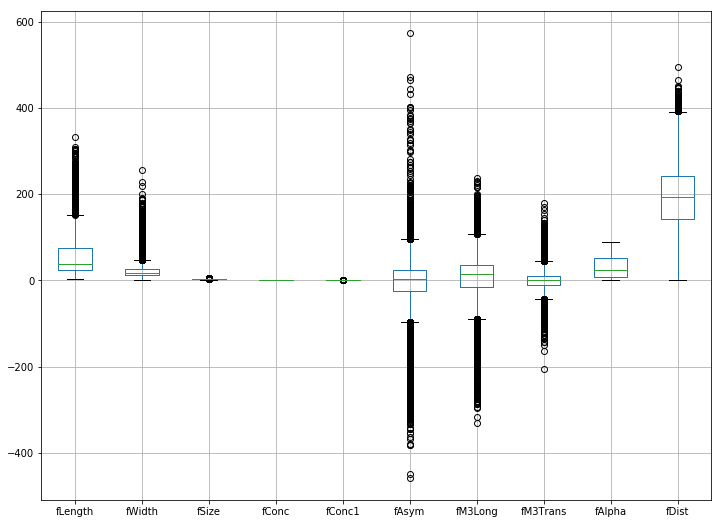

In [14]:
X.boxplot(figsize=(12,9))

**Observations:**  
1. There are no empty or missed values
2. Data is need to be normalized as the data attributes are very distinct in ranges
3. There are attributes that contains large number of outliers such as `fAsym` and `fLength`

### 2.2. Correlation Matrix Plot

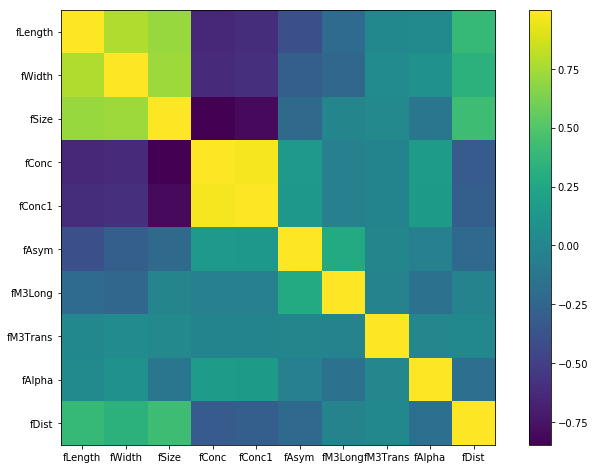

In [24]:
data_corr = X.corr()
plt.figure(figsize = (12,8))
plt.imshow(data_corr)
plt.colorbar()
plt.xticks(range(len(data_corr.columns)), data_corr.columns);
plt.yticks(range(len(data_corr.columns)), data_corr.columns);

**Observations:**  
1. `fConc` and `fConc1` seem to be very correlated with each other
2. `fConc` and `fConc1` seem also to be correlated with the first 3 attributes `fLength`, `fWidth` and `fSize`
3. `fSize` has correlation -almost=0.70- with `fLength` and `fWidth`
4. `fLength` and `fWidth` are correlated somehow wth correlation coefficient nearly = 0.75
4. other attributes seem to be uncorlleated

### 2.3. Histograms Plot

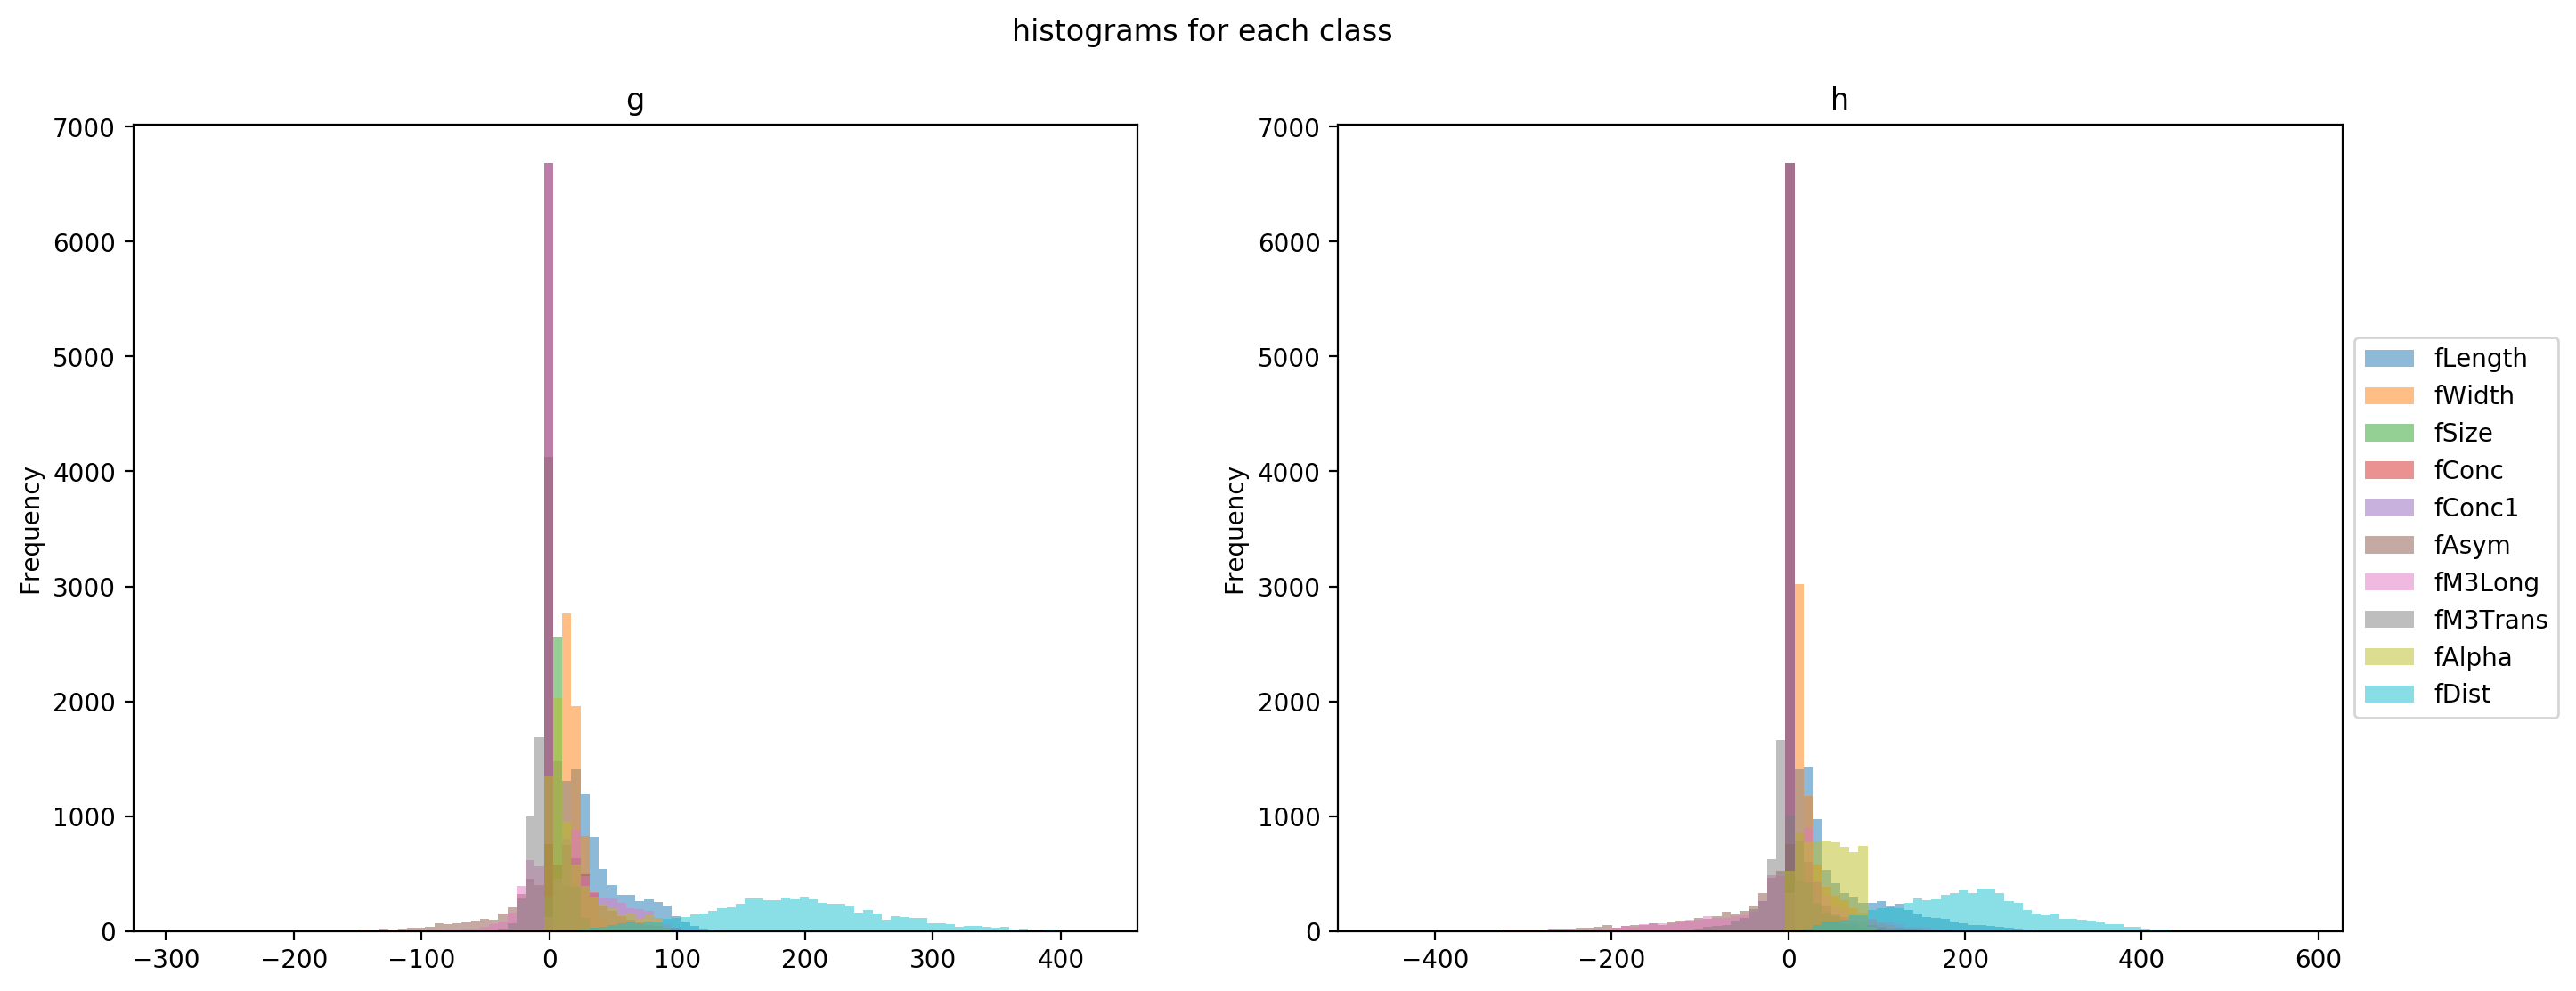

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_dpi(200)
fig.set_size_inches((16,6))
fig.suptitle("histograms for each class")
i = 0
for class_name in ["g","h"]:
    axes[i].set_title(class_name)
    class_data = balanced_data[balanced_data["class"] == class_name].drop("class", axis=1)
    hasLegend = True if i == 1 else False
    class_data.plot.hist(alpha=0.5, bins=100, ax = axes[i], legend=hasLegend)
    i+=1
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Observations:**  
1. `g` class and `h` class have different distribution shapes at fAlpha `attribute`
2. `fConc` and `fConc1` are almost the same in the 2 classes
3. `h` range is between -400 and 600, on the other hand, `g` range is between -300 and 400 only

### 2.4. Line Charts

In [168]:
def lineChartPlot(attrs):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_dpi(200)
    fig.set_size_inches((16,6))
    fig.suptitle("Line charts for each class discretized into 100 intervals")
    i = 0
    for class_name in ["g","h"]:
        axes[i].set_title(class_name)
        disc_X = pd.DataFrame(columns=attrs);
        plt.style.use('ggplot')
        class_data = balanced_data[balanced_data["class"] == class_name].drop("class", axis=1)
        for col in attrs:
            disc_X[col] = pd.cut(class_data[col],100)
            categories = disc_X[col].cat.categories
            ind = np.array([x for x, _ in enumerate(categories)])
            grouped_X = disc_X.groupby(disc_X[col]).size()
            axes[i].plot(ind, grouped_X, label=col)
        axes[i].legend(loc='best')
        axes[i].set_xlabel("interval number")
        axes[i].set_ylabel("Frequency")
        i+=1


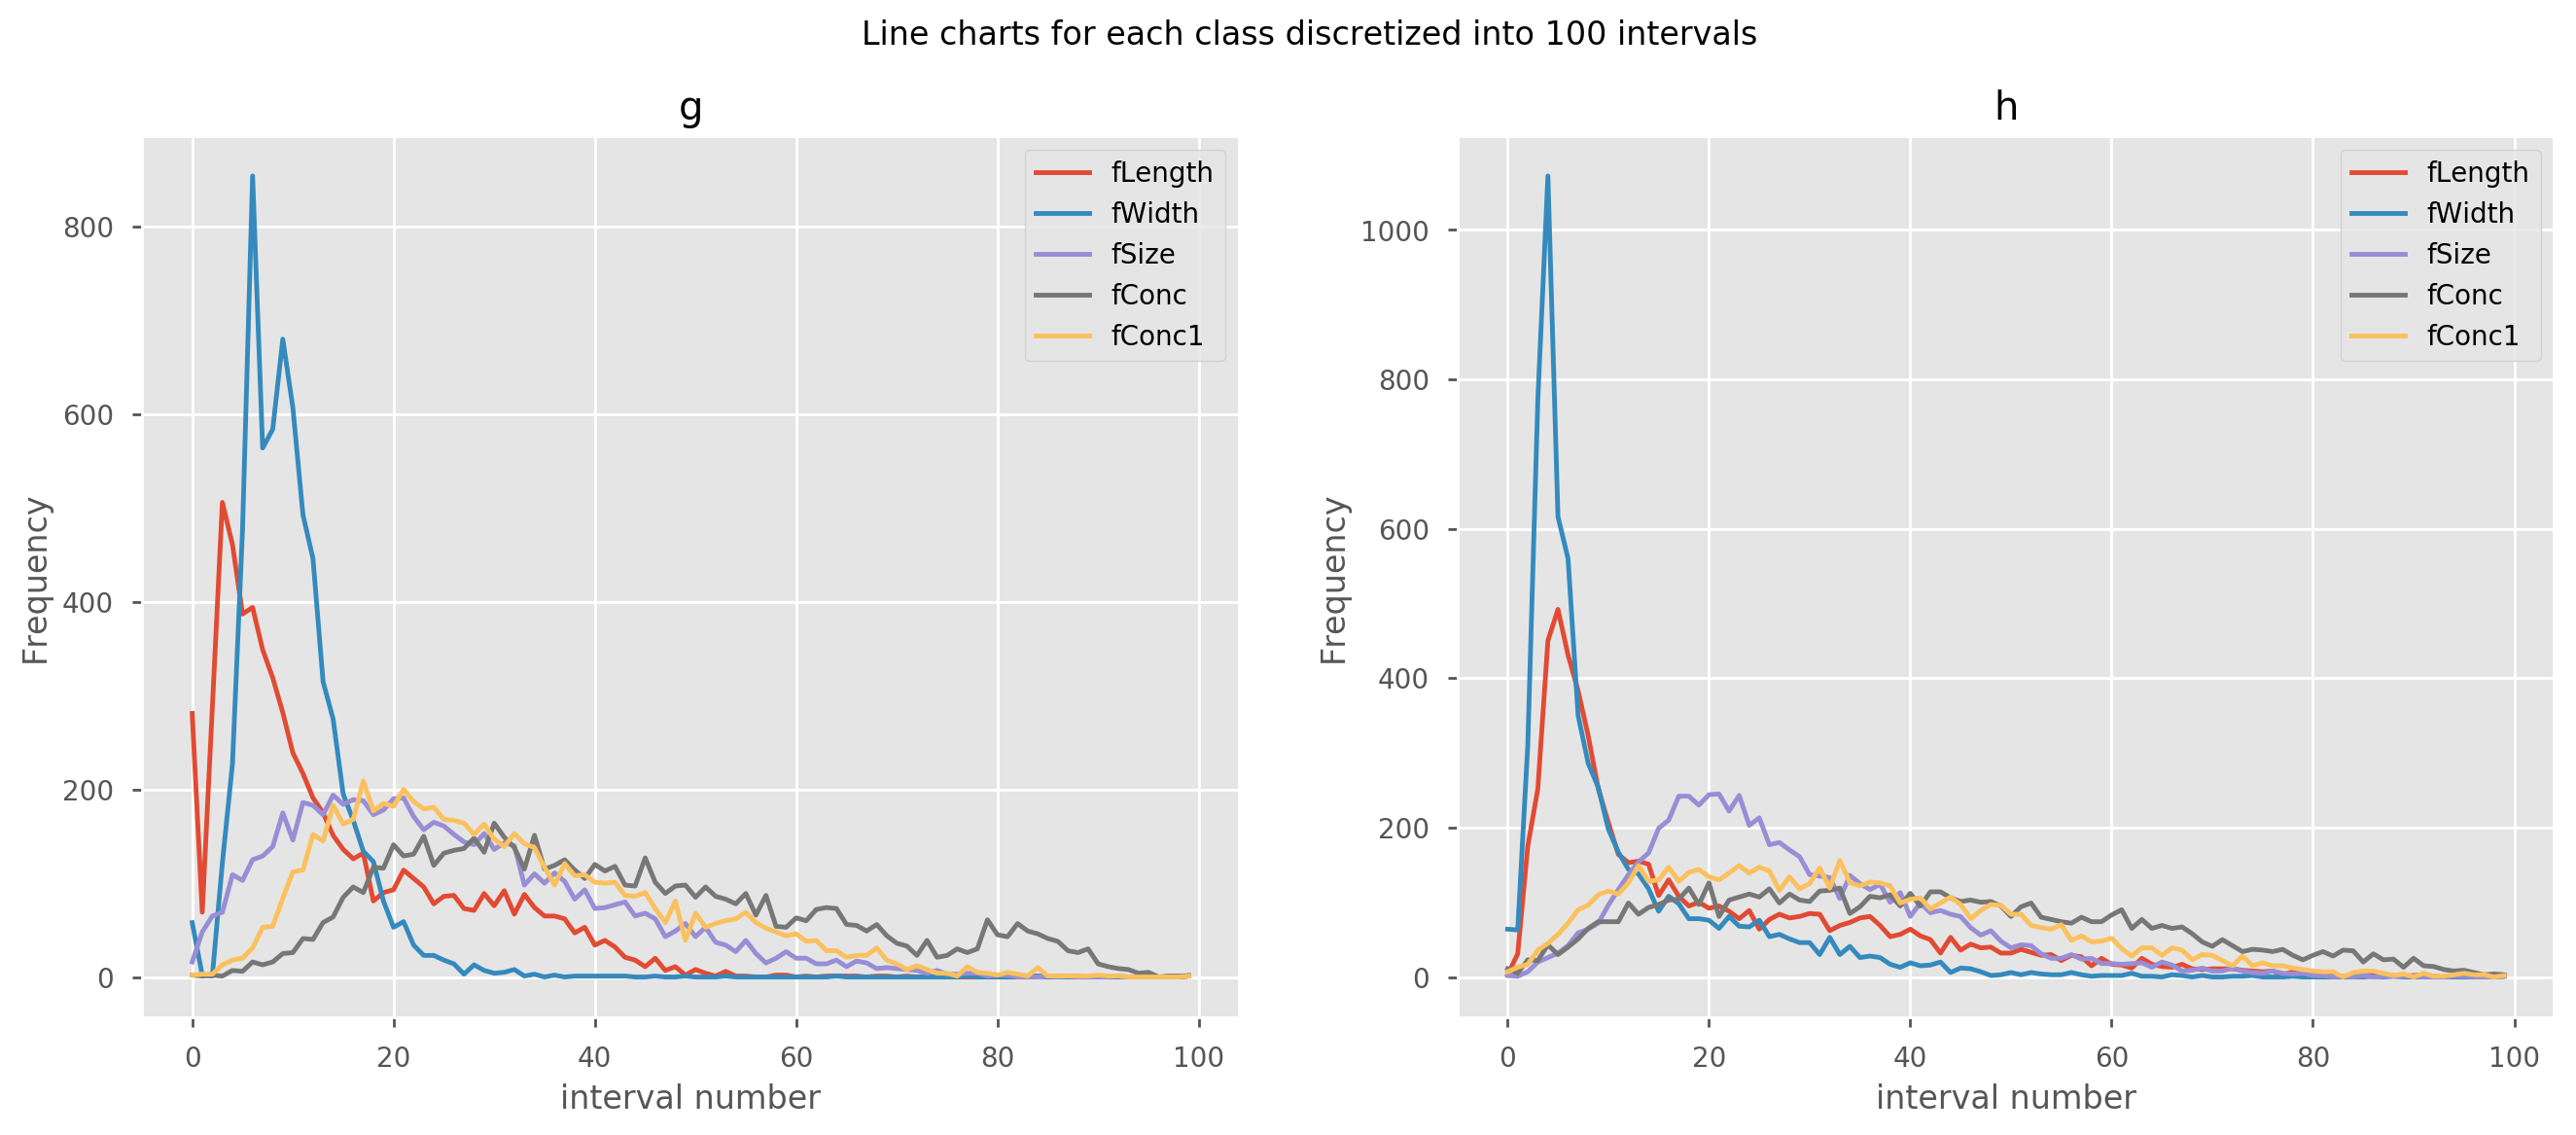

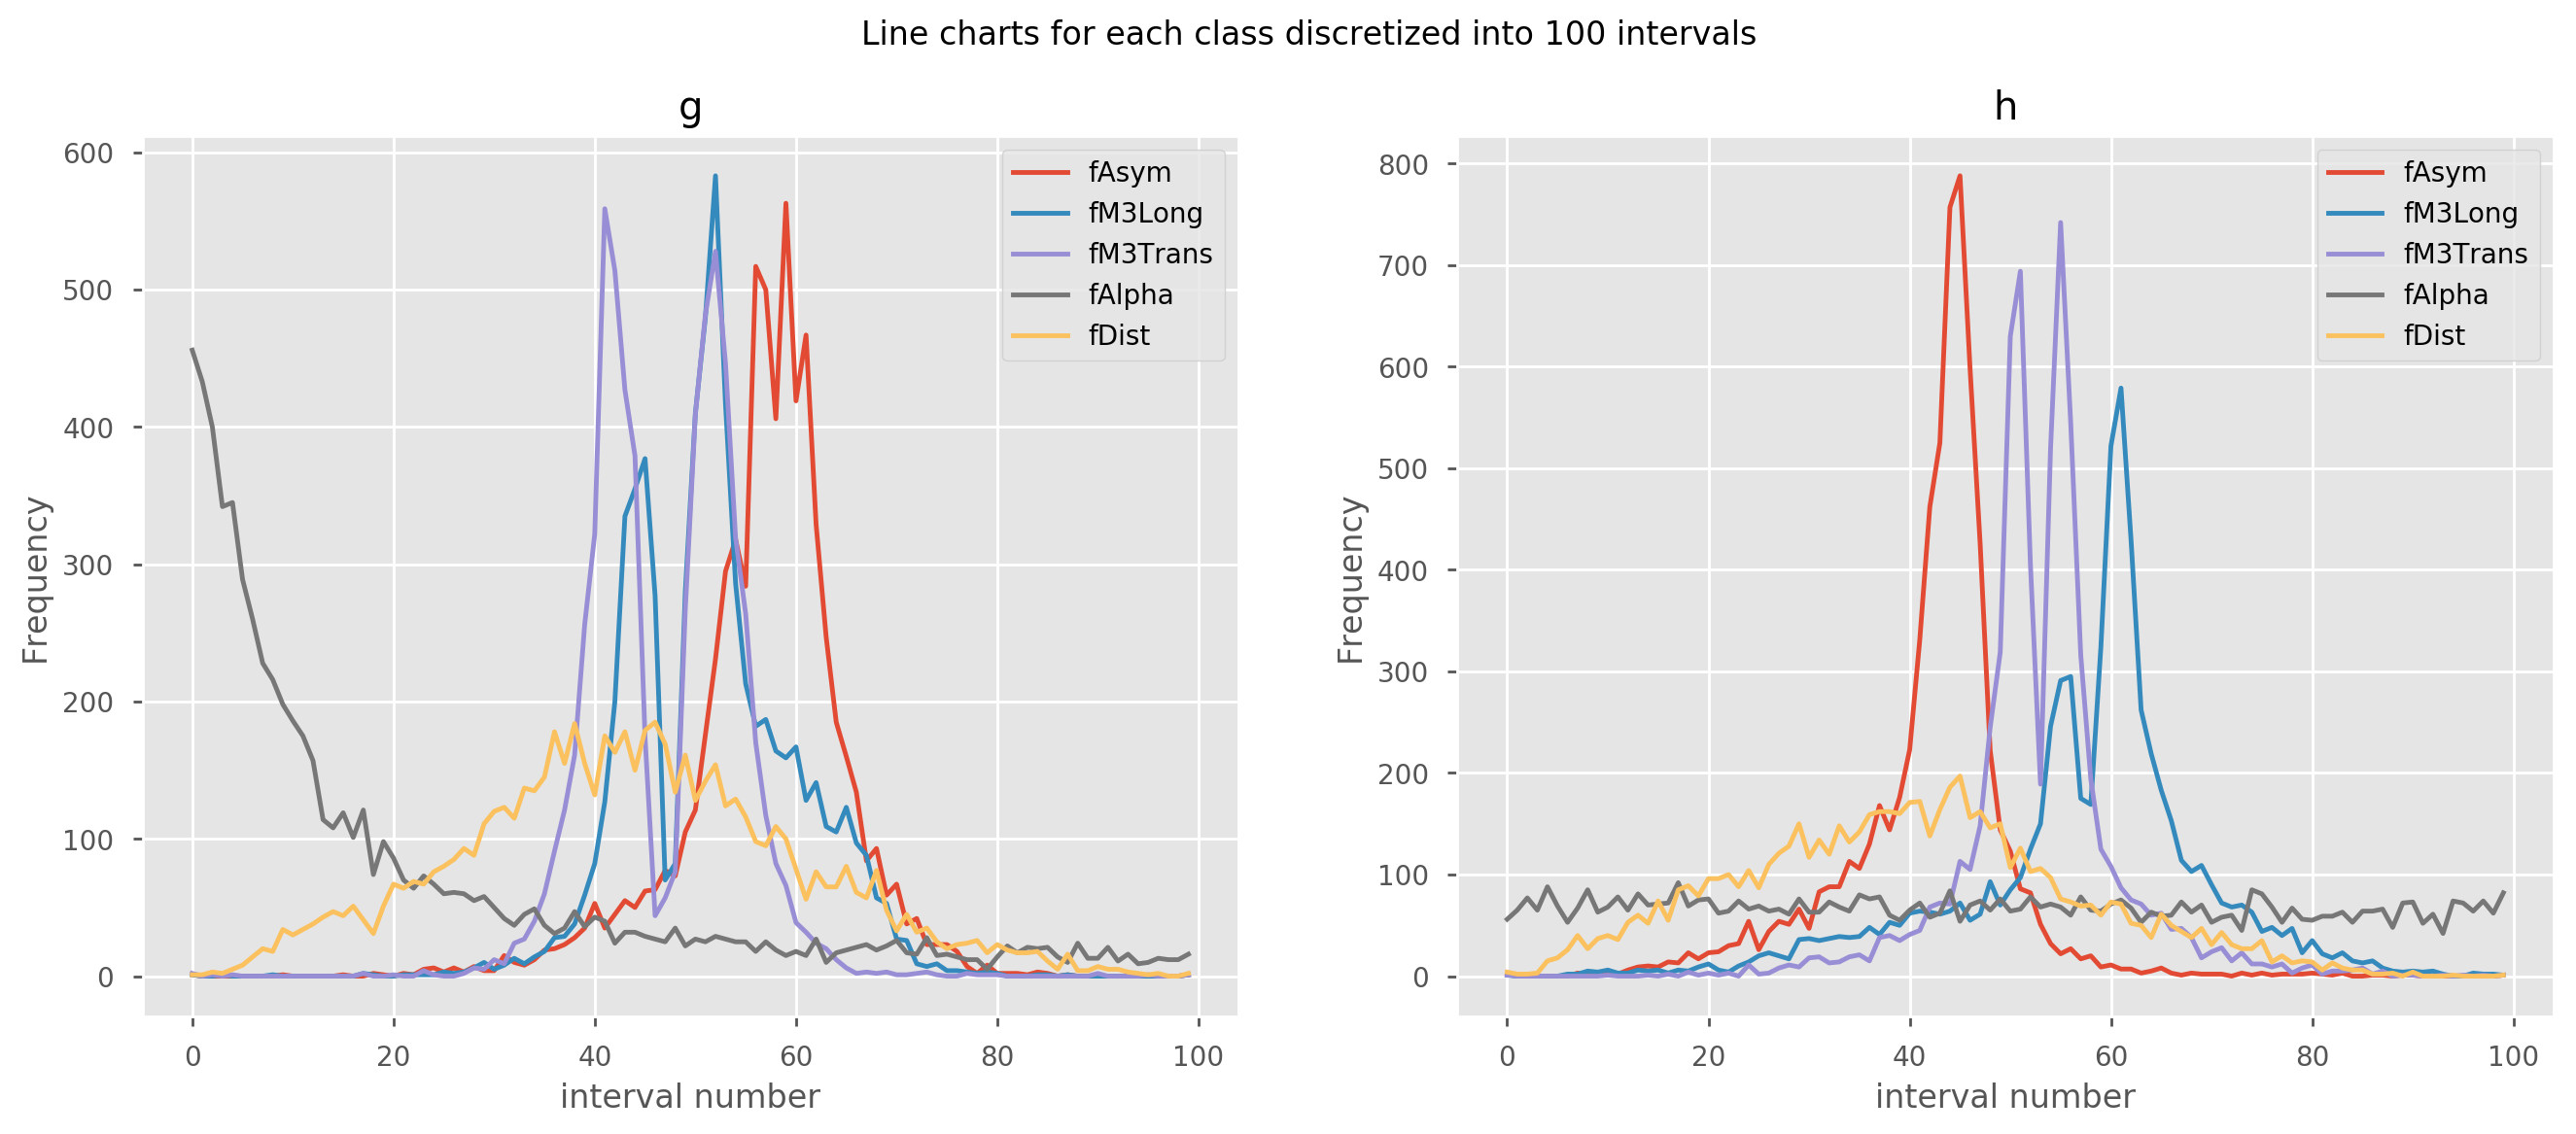

In [169]:
first_5_attrs = X.columns[:5]
last_5_attrs = X.columns[5:]
lineChartPlot(first_5_attrs)
lineChartPlot(last_5_attrs)

**Observation:**  
1. First thing to observe that the distribution of the first 2 attributes `flength` and `fwidth` are almost similar, the distribution of `fSize`, `fConc` and `fConc1` also are very close which confirm our observation that the first 2 varialbes set and the latter 3 variables set are correlated between each other.
2. Combaring each attribute in the 2 classes:
    - `fLength`: It has close distributions in the 2 classes, but we can observe that at the high values -i.e. intervals > 20 - it is more likely to be in `h` class rather than `g` class
    - `fWidth`: It is almost the same in the 2 classes which tell us that it more likely not to be useful in the classification task
    - `fSize`: As `fWidth`, it is more likely not to be useful
    - `fConc` - `fConc1`: also they are close in the 2 classes
    - `fAsym`: the two distributions show that in class values in intervals > interval #50 are more likely to be in class `g`, but values smaller than that are more likely to be in class `h` 
    - `fM3Long`: the two distributions show that in class values in intervals > interval #55 are more likely to be in class `h`, but values smaller than that can be in either of the 2 classes `g` or `h` 
    - `fM3Trans`: the two distributions show that in class values in intervals < interval #45 are more likely to be in class `g`, and values greater than that can be in either of the 2 classes `g` or `h` 
    - `fAlpha`: the disrtibutions tell us that samples have `fAlpha` values near to `0` are very likely to be in `g` class 
    - `fDist`: this attribute distribtion are almost the same in the 2 classes
---

**Conclusions after visualization:**
1. Data needs to be normalized
2. Data needs dimensionality reduction as some attributes seems to be useless
3. samples have low valus in `fAsym` are more likely to be in class `h` and high values are more likely to be in `g` class
4. samples have high values in `fM3Long` are more likely to be in class `h`, but viceversa not true
5. samples have low values in `fM3Trans` are more likely to be in class `g`,  but viceversa not true 
6. ssamples have `fAlpha` values near to 0 are more likely to be in class `g`, ,  but viceversa not true

---

### 3. Data splitting

### 4. Features Processing

---
## Classification

### 1. Creating models

### 2. Training models on raw data
#### 2.1. Train models

#### 2.2. Performance measure

### 3. Training models on preprocessed data
#### 3.1. Train models

#### 3.2. Performance measure

---
## Models Tuning

### 1. Tune models

### 2. Test models